In [27]:
import numpy as np
import psana
import tqdm

from matplotlib import pyplot as plt

In [57]:
RUN = 127 # 100 fs delay
# RUN = 129 # single pulse

ds = psana.DataSource('exp=cxig0715:run=%d' % RUN)
cspad_det = psana.Detector('CxiDs2.0:Cspad.0')
print('data connected')

gain_map = np.fromfile('../geometry/gain-center.cal', dtype=np.float32).reshape(32,185,388)
print('loaded gain map')

data connected
loaded gain map


In [58]:
events = ds.events()

for i in range(1000):
    next(events)

In [59]:
n_averaged = 0
average = np.zeros((1735, 1735), dtype=float)

for evt in events:

    raw = cspad_det.raw(evt)
    if raw is None:
        continue
    
    corrected = (raw - cspad_det.pedestals(evt)) * gain_map
    img = cspad_det.image(evt, corrected)

    if img is not None:

        mean_intensity = corrected.mean()
        if mean_intensity > 20.0:
            average += img
            n_averaged += 1
            print(n_averaged)

    if n_averaged >= 10:
        break

1
2
3
4
5
6
7
8
9
10


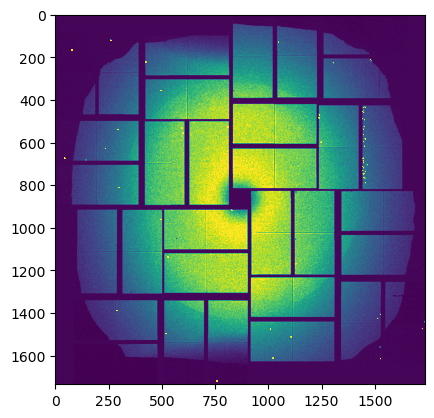

In [60]:
averaged_img = average.astype(float) / float(n_averaged)

plt.figure()
plt.imshow(averaged_img, vmin=-1, vmax=60)
plt.show()

In [61]:
np.save(f"run{RUN}_10shot_average.npy", averaged_img)

In [56]:
!ls

2x2_peek.py	  cspad_peek.py    run129_10shot_average.npy
cspad_peek.ipynb  feespec_peek.py  xtcav_peek.py
